In [38]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [39]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [40]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

(0.0, 1.0)

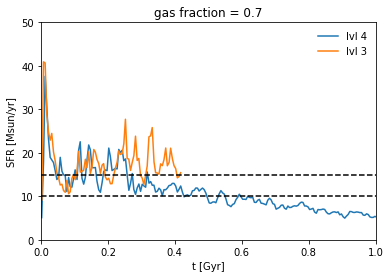

In [43]:
bin_width = 0.005

sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
plt.plot(time, sfr, label='lvl 4')

sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl3/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='lvl 3')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.7')
plt.axhline(10, c='k', ls='dashed')
plt.axhline(15, c='k', ls='dashed')
# plt.axvline(0.005*25)
plt.ylim(0, 50)
plt.xlim(0, 1)

(0.0, 1.0)

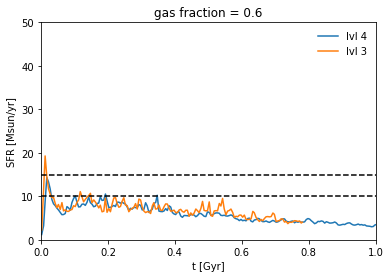

In [44]:
bin_width = 0.005

sfh_file = np.genfromtxt(basepath+'runs/MW3iso_fg0.6/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
plt.plot(time, sfr, label='lvl 4')

sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3iso_fg0.6/lvl3/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='lvl 3')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.6')
plt.axhline(10, c='k', ls='dashed')
plt.axhline(15, c='k', ls='dashed')
# plt.axvline(0.005*25)
plt.ylim(0, 50)
plt.xlim(0, 1)

In [35]:
key = sfh_file[:,0] > 0.05
print(np.mean(sfh_file[:,2][key]))

16.256741271483236


### morphology

In [46]:
sn_fid = {}
# sn_lim1 = {}
# sn_lim2 = {}
for i in [4, 3]:
    
    sn_fid[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7/lvl'+str(i)+'/output', 50, combineFiles=True)
    # sn_lim1[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl'+str(i)+'-limiter/output', 50, combineFiles=True)
    # sn_lim2[i] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl'+str(i)+'-limiter2/output', 50, combineFiles=True)


Text(0.5, 1.0, 'fiducial')

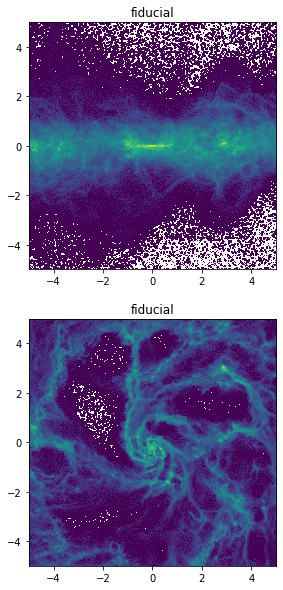

In [51]:
lvl = 3
nres = 256
range_xy = [[-5, 5], [-5, 5]]
vmin=1E-3
vmax=10.**(0.5)
extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

dx = (range_xy[0][1] - range_xy[0][0])/nres
dy = (range_xy[1][1] - range_xy[1][0])/nres
surf = dx * dy

fig, ax = plt.subplots(2, 1, figsize=(5, 10))

sn = sn_fid[lvl]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,2].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[0].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[0].set_title('fiducial')

sn = sn_fid[lvl]
x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
mass = sn.part0.mass
hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
im = ax[1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax[1].set_title('fiducial')

# sn = sn_lim1[lvl]
# x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
# y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
# mass = sn.part0.mass
# hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
# im = ax[1].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# ax[1].set_title('limiter=1kpc')

# sn = sn_lim2[lvl]
# x = sn.part0.pos[:,0].value - sn.BoxSize.value/2.
# y = sn.part0.pos[:,1].value - sn.BoxSize.value/2.
# mass = sn.part0.mass
# hmap, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass/surf)
# im = ax[2].imshow(hmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# ax[2].set_title('limiter=2kpc')

In [52]:
sn.NumPart_Total[2]*sn.MassTable[2]

0.59897702 1e+10 Msol

### Phase diagram

In [116]:
def compute_KS(sn, dR=0.5):

    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    pos = sn.part0.pos.value - center
    sfr = sn.part0.sfr
    mass = sn.part0.mass.value
    
#     R = np.linalg.norm(pos[:,:2], axis=1)
    
#     Rmax = 6
    
#     Sigma_gas = []
#     Sigma_sfr = []
    
#     Rmin = 0
#     while Rmin < Rmax:
#         key = np.logical_and(R > Rmin, R < Rmin + dR)
        
#         Sigma_gas_ = np.sum(1E10*mass[key])
#         Sigma_gas_ /= 1000**2
#         Sigma_gas_ /= np.pi*((Rmin+dR)**2 - Rmin**2)
#         Sigma_gas.append(Sigma_gas_)
        
#         Sigma_sfr_ = np.sum(sfr[key])
#         Sigma_sfr_ /= np.pi*((Rmin+dR)**2 - Rmin**2)
#         Sigma_sfr.append(Sigma_sfr_)
        
#         Rmin += dR

    Sigma_gas, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], 1E10*mass, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_gas /= (1000*dR)**2

    Sigma_sfr, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], sfr, 
                                             statistic='sum', bins=np.arange(-8, 8, dR))
    Sigma_sfr /= dR**2

    Sigma_gas = Sigma_gas.flatten()
    Sigma_sfr = Sigma_sfr.flatten()
    
    return Sigma_gas, Sigma_sfr
    

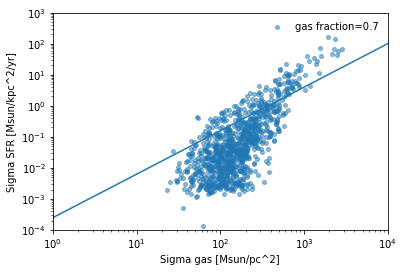

In [121]:
lvl = 3
Sigma_gas_fid, Sigma_sfr_fid = compute_KS(sn_fid[lvl], dR=0.1)
# Sigma_gas_lim1, Sigma_sfr_lim1 = compute_KS(sn_lim1[lvl], dR=0.1)
# Sigma_gas_lim2, Sigma_sfr_lim2 = compute_KS(sn_lim2[lvl], dR=0.1)

key = np.random.choice(len(Sigma_gas_fid.flatten()), len(Sigma_gas_fid.flatten())//2, replace=False)

plt.scatter(Sigma_gas_fid.flatten()[key], Sigma_sfr_fid.flatten()[key], label='gas fraction=0.7', alpha=0.5, s=16)
# plt.scatter(Sigma_gas_lim1.flatten()[key], Sigma_sfr_lim1.flatten()[key], label='lim=1kpc', alpha=0.5, s=16)
# plt.scatter(Sigma_gas_lim2.flatten()[key], Sigma_sfr_lim2.flatten()[key], label='lim=2kpc', alpha=0.5, s=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1E4)
plt.ylim(1E-4, 1E3)

xKS = np.linspace(1, 1E4, 10000)
yKS = 2.5E-4 * xKS**1.4
plt.plot(xKS, yKS)
plt.xlabel('Sigma gas [Msun/pc^2]')
plt.ylabel('Sigma SFR [Msun/kpc^2/yr]')
plt.legend(frameon=False)


In [119]:
print(np.max(Sigma_gas_fid))
print(np.max(Sigma_gas_lim2))

4361.846669824219


NameError: name 'Sigma_gas_lim2' is not defined

### phase diagram

In [110]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [111]:
lvl=3

Tfid = compute_T(sn_fid[lvl])
nfid = compute_n(sn_fid[lvl])
mfid = sn_fid[lvl].part0.mass.value

[Text(0.5, 0, 'log n [cm^-3]'), Text(0, 0.5, 'log T [K]')]

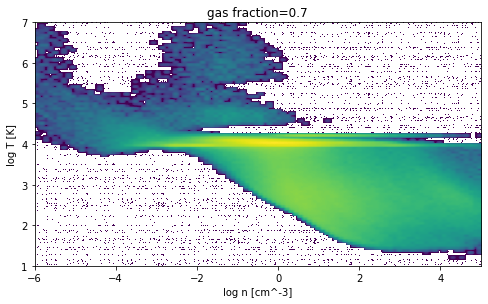

In [115]:
rng = [[-6, 5], [1, 7]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# ---- #

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(nfid), np.log10(Tfid), mfid, 
                                                  statistic='sum', bins=100, range=rng)
extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7), title='gas fraction=0.7')
ax.set(xlabel='log n [cm^-3]', ylabel='log T [K]')

### mass loading

In [53]:
def mass_loading(sn, z0):
    center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
    pos = sn.part0.pos.value - center
    vel = sn.part0.vel.value
    mass = sn.part0.mass.value

    dr = 0.1 * z0

    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    r = np.linalg.norm(pos, axis=1)
    phi = np.arctan2(y, x)
    theta = np.arccos(z/r)

    rhat = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
    vel_r = rhat[0]*vel[:,0] + rhat[1]*vel[:,1] + rhat[2]*vel[:,2]

    key = np.logical_and(np.abs(z) > z0-dr/2, np.abs(z) < z0+dr/2)
    key_out = np.logical_and(key, vel_r > 0)
    key_in = np.logical_and(key, vel_r < 0)

    Mdot_out = np.sum(mass[key_out]*vel_r[key_out])/dr
    Mdot_in = np.sum(mass[key_in]*vel_r[key_in])/dr
    
    return Mdot_out, Mdot_in

In [57]:
lvl = 3

sfh_file_l3 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl'+str(lvl)+'/output/sfr.txt')

sn = sn_fid[lvl]
time = sn.Time.value
key = np.abs(sfh_file_l3[:,0] - time) < 0.15
mean_SFR = np.mean(sfh_file_l3[:,2][key])

Mdot_out = {}
Mdot_in = {}
for z0 in [1, 3, 5, 10]:
    Mdot_out_, Mdot_in_ = mass_loading(sn, z0)
    Mdot_out[z0] = Mdot_out_
    Mdot_in[z0] = Mdot_in_
    
    print('z0=', z0, 'eta_M=', round(Mdot_out_/mean_SFR, 5))

z0= 1 eta_M= 0.11983
z0= 3 eta_M= 0.0145
z0= 5 eta_M= 0.00776
z0= 10 eta_M= 0.00262


### scale height of young stars

In [71]:
lvl = 3
sn = sn_fid[lvl]
center = sn.part1.pos[np.argmin(sn.part1.pot)]

z = sn.part4.pos[:,2] - center[2]

Nstar, zbin = np.histogram(np.abs(z), bins=np.linspace(0, 1, 100));
zcen = 0.5*(zbin[1:] + zbin[:-1])


In [91]:
from scipy.optimize import minimize
def vert_profile(z, A, z0):
    return A / np.cosh(z/(2*z0))**2

def _to_minimize(x, z0, Nstar):
    A, z0 = x
    prof = vert_profile(zcen, A, z0)
    return np.sum(np.square(prof - Nstar))

out = minimize(_to_minimize, [100, 0.5], args=(zcen, Nstar), bounds=((0, 20*Nstar[0]), (0, 1)))

<ipython-input-91-fc55af0498a9>:3: RuntimeWarning: divide by zero encountered in true_divide
  return A / np.cosh(z/(2*z0))**2
<ipython-input-91-fc55af0498a9>:3: RuntimeWarning: overflow encountered in cosh
  return A / np.cosh(z/(2*z0))**2


In [92]:
out

      fun: 1477581822.772653
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.76972344e+01, 1.45082474e+06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 141
      nit: 15
     njev: 47
   status: 0
  success: True
        x: array([5.07678846e+04, 2.73802746e-02])

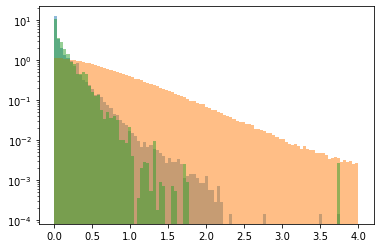

In [106]:
lvl = 3
sn = sn_fid[lvl]
center = sn.part1.pos[np.argmin(sn.part1.pot)]

age = sn.Time.value - sn.part4.GFM_StellarFormationTime < 0.1

znew = sn.part4.pos[:,2][age] - center[2]
zold = sn.part2.pos[:,2] - center[2]

key = sn.part0.sfr > 0
zgas = sn.part0.pos[:,2][key] - center[2]

plt.hist(np.abs(znew), bins=np.linspace(0, 4, 100), alpha=0.5, density=True);
plt.hist(np.abs(zold), bins=np.linspace(0, 4, 100), alpha=0.5, density=True);
plt.hist(np.abs(zgas), bins=np.linspace(0, 4, 100), alpha=0.5, density=True);
plt.yscale('log')


In [107]:
velz = sn.part4.vel[:,2]
print(np.std(velz))

32.13939


In [108]:
velz = sn.part2.vel[:,2]
print(np.std(velz))

60.48999
